In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MSE(x, y, b0, b1):
    # Function to obtain the loss and the gradients using Mean Squared Error
    pred = np.multiply(b1, x) + b0
    loss = 0.5 * np.mean(np.power((y - pred), 2))
    gradient0 = np.mean(pred - y)
    gradient1 = np.mean(x * (pred - y))
    return loss, gradient0, gradient1

In [3]:
def gradient_descent(data, init_b0, init_b1, lr, num_epochs):
    x = data[:,0]
    y = data[:,1]
    b0 = init_b0 # Starting with initial guess for b0
    b1 = init_b1 # Starting with initial guess for b1
    b_list = []
    loss_list = []
    
    for i in range(num_epochs):
        b_list.append((b0,b1)) # Adds current (b0, b1) to the list
        # Compute loss and gradients
        loss, grad0, grad1 = MSE(x, y, b0, b1)
        loss_list.append(loss) # Adds current loss to the list
        # Update model parameters
        b0 -= (lr * grad0)
        b1 -= (lr * grad1)
    
    #Add final (b0, b1) and loss values to their list.
    b_list.append((b0,b1)) 
    loss, grad0, grad1 = MSE(x, y, b0, b1)
    loss_list.append(loss)
    
    return b_list, loss_list

In [4]:
data = np.load('p3_data.npy')

In [5]:
B, loss = gradient_descent(data, 18, 5, 0.0001, 1000)

Final b0 and b1 values are:  (17.93432667747319, 0.9618342679700583)
Final loss value is:  3.097854325598297


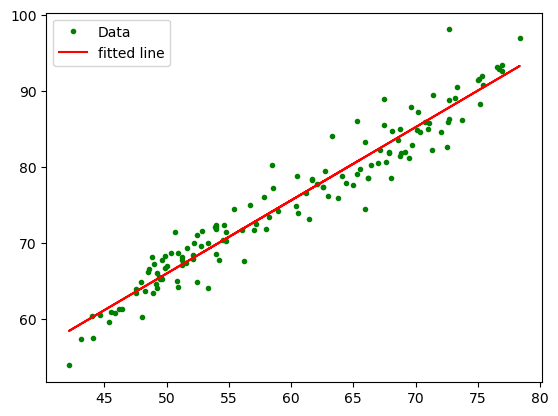

In [6]:
print("Final b0 and b1 values are: ", B[-1])
print("Final loss value is: ", loss[-1])

plt.plot(data[:,0], data[:,1], '.', c='g', label = "Data")
plt.plot(data[:,0], B[-1][0] + data[:,0]*B[-1][1], c='r', label = "fitted line")
plt.legend()
plt.show()

Final loss and B values are:  3.0978541866329126 ,  (17.934444545603046, 0.96183234761207)


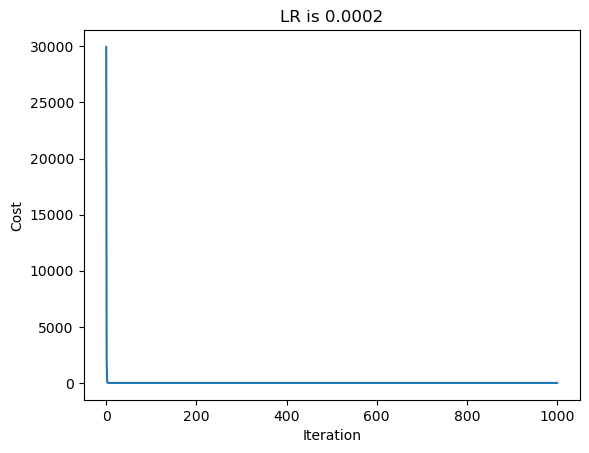

Final loss and B values are:  1.4073988952349527e+165 ,  (1.426267297867182e+79, 8.75417292526297e+80)


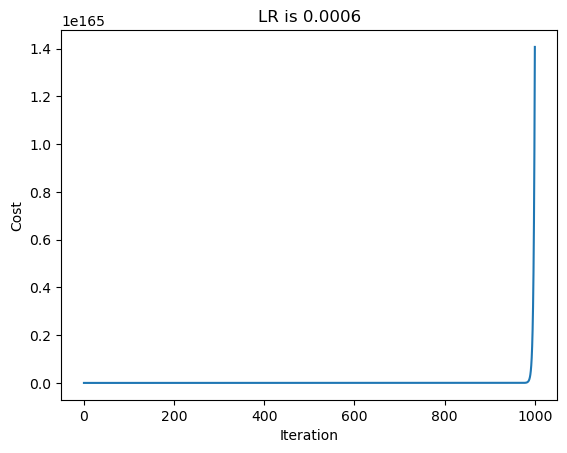

Final loss and B values are:  nan ,  (nan, nan)


/var/folders/9_/zlyt_0jn1cj4plrbb7kf80d80000gn/T/ipykernel_36279/4009443656.py:4: RuntimeWarning: overflow encountered in power
  loss = 0.5 * np.mean(np.power((y - pred), 2))
/Users/abuitano/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/9_/zlyt_0jn1cj4plrbb7kf80d80000gn/T/ipykernel_36279/2723580597.py:16: RuntimeWarning: invalid value encountered in double_scalars
  b1 -= (lr * grad1)


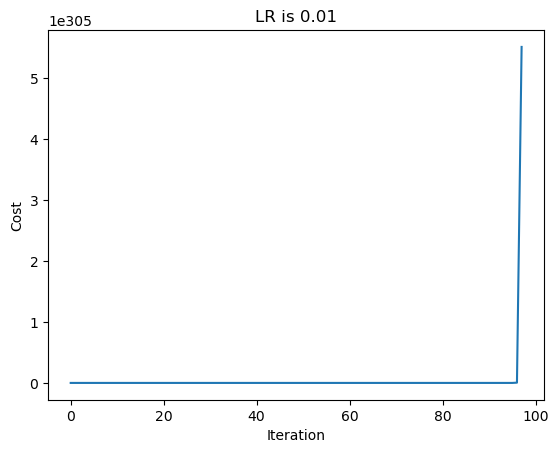

Final loss and B values are:  nan ,  (nan, nan)


/var/folders/9_/zlyt_0jn1cj4plrbb7kf80d80000gn/T/ipykernel_36279/4009443656.py:3: RuntimeWarning: overflow encountered in multiply
  pred = np.multiply(b1, x) + b0
/var/folders/9_/zlyt_0jn1cj4plrbb7kf80d80000gn/T/ipykernel_36279/4009443656.py:6: RuntimeWarning: overflow encountered in multiply
  gradient1 = np.mean(x * (pred - y))
/var/folders/9_/zlyt_0jn1cj4plrbb7kf80d80000gn/T/ipykernel_36279/2723580597.py:15: RuntimeWarning: invalid value encountered in double_scalars
  b0 -= (lr * grad0)


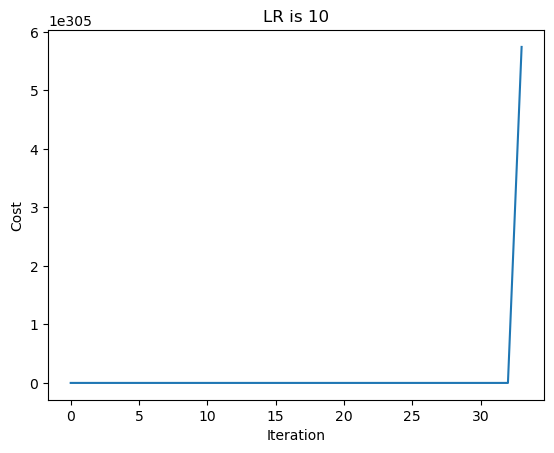

In [7]:
for lr in [0.0002, 0.0006, 0.01, 10]:
    B, loss = gradient_descent(data, 18, 5, lr, 1000)
    print("Final loss and B values are: ", loss[-1], ", ", B[-1])
    
    plt.plot(loss)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"LR is {lr}")
    plt.show()

I think the best learning rate out of the ones tested is 0.0002, as this will still converge and in less iterations than 0.0001. 
The other larger learning rates start diverging, so they are not good for this model.

*Normal equation derivation is in handwritten notes*

Gradient descent is an iterative method to optimize a function, or to find a local minimum by moving in the direction of steepest descent, using the gradient. We use it to find the parameters (b0, b1,..., bn) of our hypothesis function in order to minimize the loss we get vs the ground truths.

Three types of gradient descent:
 - Batch gradient descent: in this type of GD, we process all of the data with the current parameters before updating.
 - Stochastic gradient descent: here, we update the parameters for every sample, at every step (slow)
 - Mini-batch gradient descent: A trade-off of the last two types of GD, where we update after a specified subset of the data (a batch) is processed, at each step.

In [8]:
lr = 0.0005447
B, loss = gradient_descent(data, 18, 5, lr, 10000)

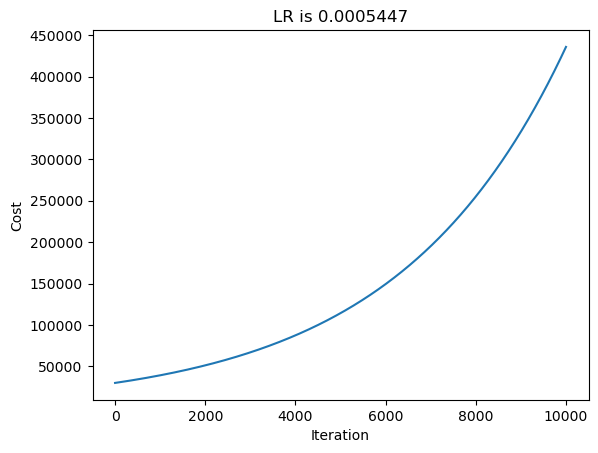

In [9]:
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title(f"LR is {lr}")
plt.show()

The upper bound of learning rate for this model seems to be just under 0.000545. Divergence occurs starting at a learning rate of 0.0005447.

In [10]:
def mini_GD(data, init_b0, init_b1, lr, num_iterations, batch_size):
    # Function for mini-batch gradient descent
    x = data[:,0]
    y = data[:,1]
    b0 = init_b0
    b1 = init_b1
    b_list = []
    loss_list = []
    num_batches = len(x) // batch_size
    num_epochs = num_iterations // num_batches
    
    for epoch in range(num_epochs):
        for b in range(num_batches):
            b_list.append((b0,b1)) # Adds current (b0, b1) to the list
            # Compute loss and gradients
            
            pred = np.multiply(b1, x[b*batch_size: (b+1)*batch_size]) + b0
            loss = 0.5 * np.mean(np.power((y[b*batch_size: (b+1)*batch_size] - pred), 2))
            gradient0 = np.mean(pred - y[b*batch_size: (b+1)*batch_size])
            gradient1 = np.mean(x[b*batch_size: (b+1)*batch_size] * (pred - y[b*batch_size: (b+1)*batch_size]))
            
            loss, grad0, grad1 = MSE(x, y, b0, b1)
            loss_list.append(loss) # Adds current loss to the list
            # Update model parameters
            b0 -= (lr * grad0)
            b1 -= (lr * grad1)
    
    #Add final (b0, b1) and loss values to their list.
    b_list.append((b0,b1)) 
    loss, grad0, grad1 = MSE(x, y, b0, b1)
    loss_list.append(loss)
    
    return b_list, loss_list

In [11]:
B, loss = mini_GD(data, 18, 5, 0.0005, 100, 20)

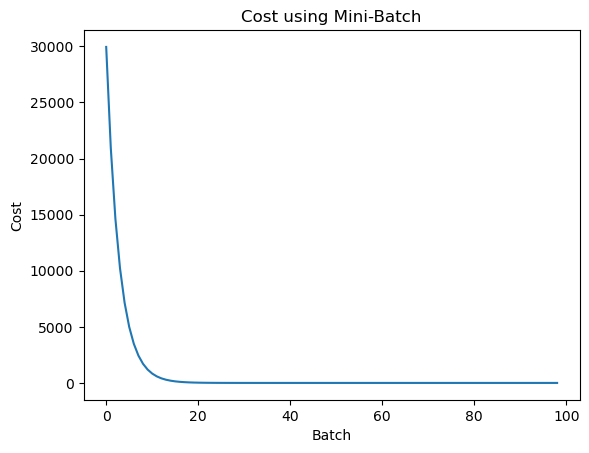

In [12]:
plt.plot(loss)
plt.xlabel("Batch")
plt.ylabel("Cost")
plt.title("Cost using Mini-Batch")
plt.show()

Using mini-batch GD, the cost decreases much faster. It converges with less iterations than the batch GD done previously.